              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

.values =
array([-0.01806955, -0.00788378, -0.14122765, -0.16843807])

.base_values =
np.float64(0.33561904761904765)

.data =
array([5.7, 2.8, 4.5, 1.3])
Variable Importance Plot - Global Interpretation


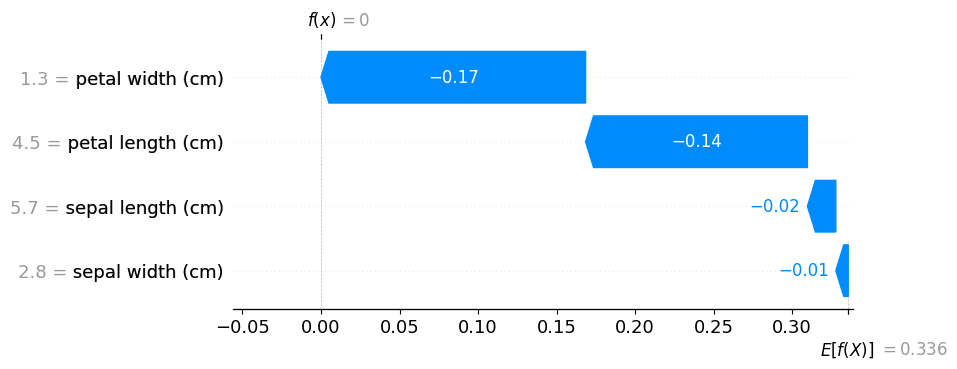

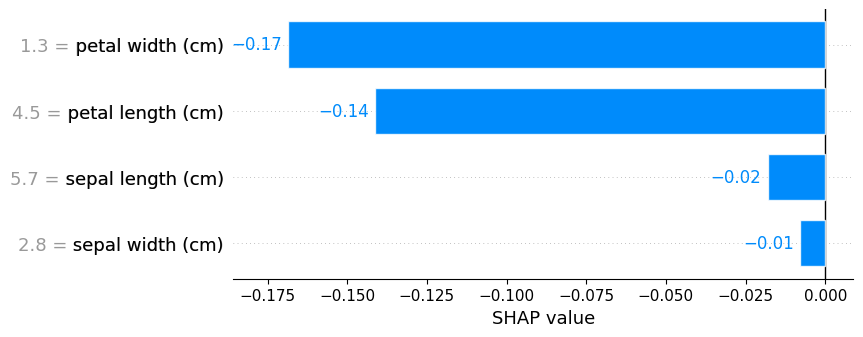

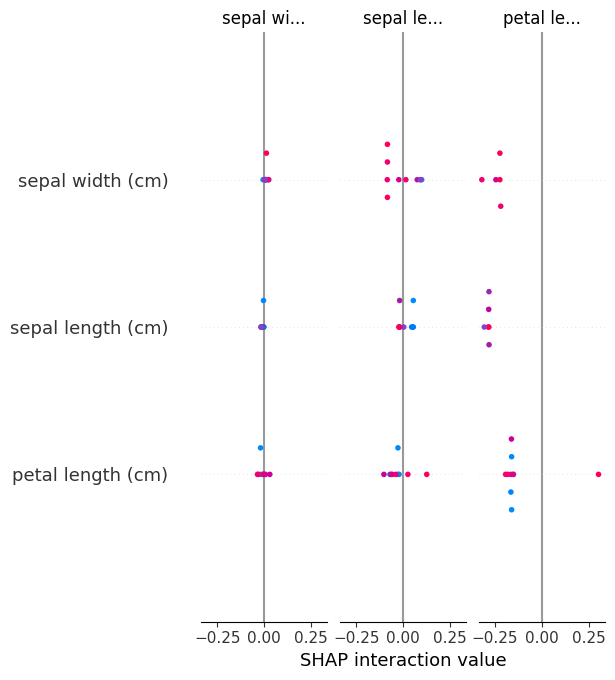

In [166]:
import shap
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Separate Features and Target Variables
X,y = shap.datasets.iris()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                	stratify =y,
                                                	random_state = 13)

rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_pred, y_test))

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer(X_test)

explanation_instance = shap_values[0,::,0]
print("Variable Importance Plot - Global Interpretation")
plt.figure()
shap.plots.waterfall(explanation_instance)
shap.plots.force(explanation_instance)
shap.plots.bar(explanation_instance)
shap.summary_plot(shap_values[:10], X_test[:10], feature_names=X_test[:10].columns) 
